# Declaration of Originality

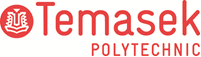

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Nur Assyakirin (2405297I)
* Tutorial Group                : B01
* Tutor						    : Ruchir SRIVASTAVA
* Submission Date               : 11/02/2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve)

# 1. Business Understanding
Banks frequently conduct marketing campaigns to promote term deposits. However, most customers did not subscribe so resulting in waste of marketing resources and unnecessary contact with not interested clients.

The goal is to predict whether a client will subscribe to a term deposit based on demographic, financial and campaign-related attributes.

By identifiying high probability customers, the bank can:
- improve the campaign conversion rates
- reduce marketing costs
- focus more on resources that has the most promising leads

This is more towards a binary classification problem where the target variable 'y' indicates whether a customer has subscribe (yes) or (no).

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
import pandas as pd

## Read *.csv file into pandas DataFrame
df = pd.read_csv("bank-additional-full.csv", sep=";") # dataset uses ';' as seperator
df 

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


The dataset is sourced from the UCI Machine Learning Repository. It contains the marketing campaign data from a Portuguese Bank.

## 2.2 Summary Statistics

In [3]:
## the dataset contains 41,188 rows with 20 input features and 1 binary target variable y. 
## Understand the type of variable for each column
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
## Check for missing data
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [5]:
## Describe data distribution
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188,41188,41188,41188,41188,41188,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,12,4,8,3,3,3,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [6]:
df['y'].value_counts(normalize=True) ## for imbalanced dataset

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

My Key Observations:
- the dataset contains 41,188 records which meets the minimum sample size.
- there are no missing values which reducing the need for imputation.
- the target variable is imbalanced with about 11% to 12% positive cases.
- class imbalance suggests that accuracy alone may not be an appropriate evaluation metric.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

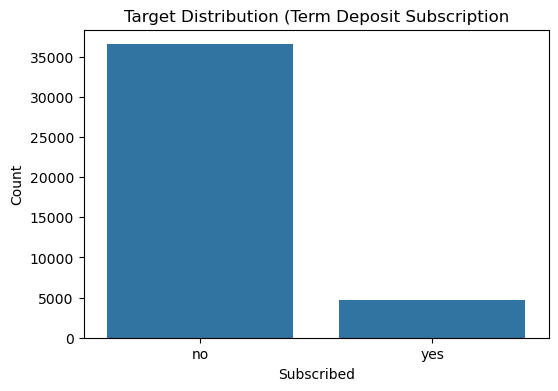

In [7]:
## plot the distribution of the target variable y
## its to understand the class imbalance in the dataset
plt.figure(figsize=(6,4))
sns.countplot(x='y', data=df)

plt.title('Target Distribution (Term Deposit Subscription')
plt.xlabel('Subscribed')
plt.ylabel('Count')
plt.show()

The target distribution confirms a strong class imbalance. This shows that predicting only the majority class would only lead to misleading of high accuracy but poor business value.

### 2.3.1.2 Understanding distribution of features

In [8]:
print(df.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


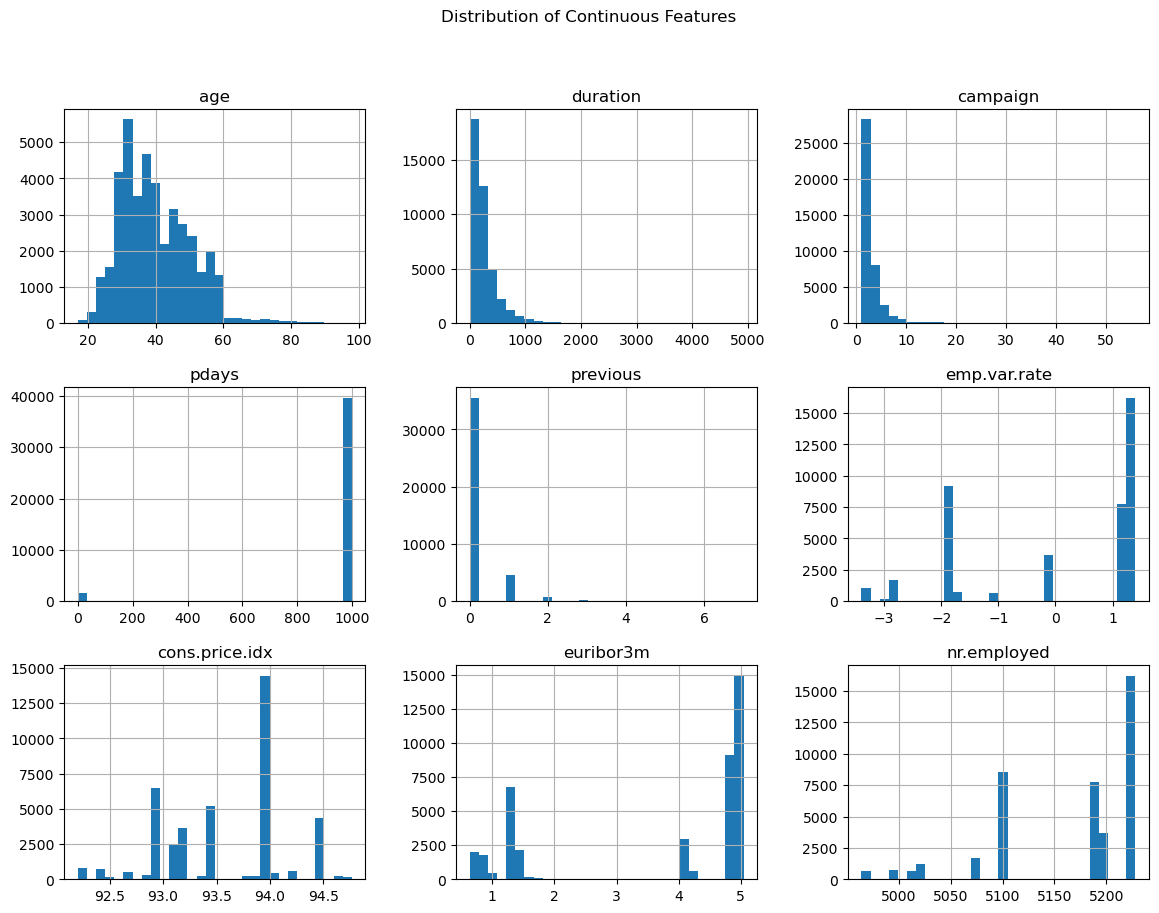

In [9]:
## list of continuous (numeric) features in the dataset
## it will be analysed for skewness, outliers and scale differences
continuous_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'euribor3m', 'nr.employed']

## plot histogram for continuous features
## this is so to help identify skewed distributions and potential outliers
df[continuous_features].hist(figsize=(14,10), bins=30)

plt.suptitle('Distribution of Continuous Features')
plt.show()

My Key Observations from continuous feature distribution:
- variables such as "duration" and "campaign" are right-skewed.
- some features show extreme values which may affect linear models.
- scaling will be necessary for Logistic Regression.

### 2.3.2 Understanding relationship between variables

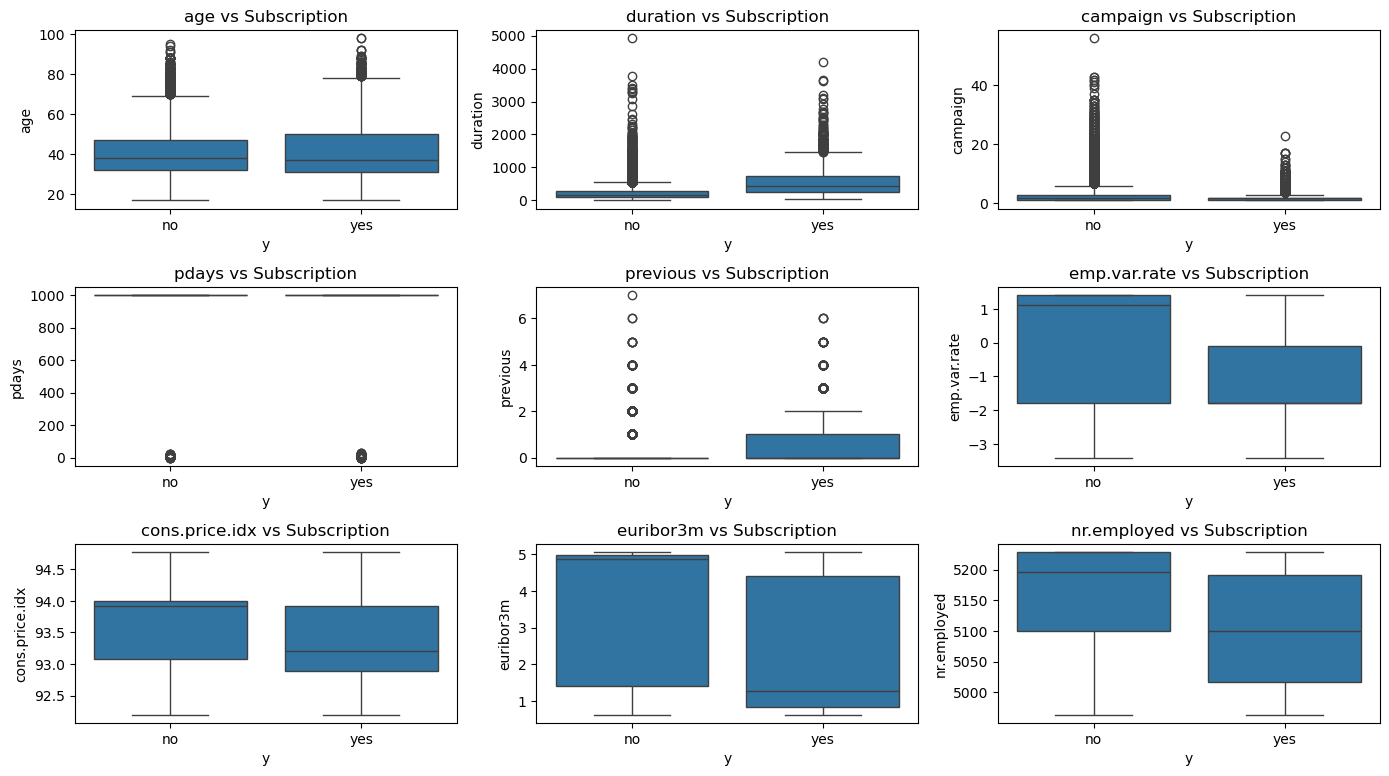

In [10]:
## boxplots to compare continuous features against the target variable
plt.figure(figsize=(14,10))
for i, col in enumerate(continuous_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'{col} vs Subscription')
plt.tight_layout()
plt.show()

My Key Obervations on Boxplot:
- "duration" shows a strong separation between subscribed and non-subscribed clients.
- this suggests that call duration is highly predictive but it may also lead to introducing data leakage since duration is only known after the call is completed.

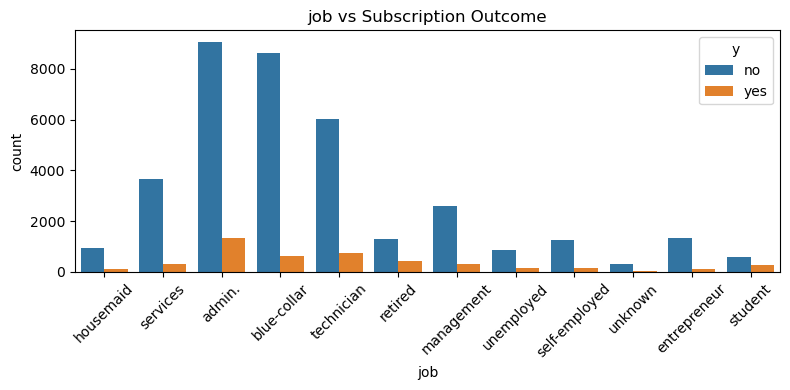

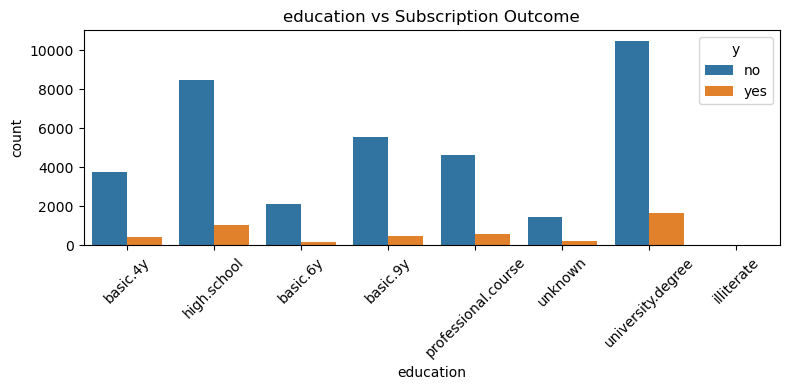

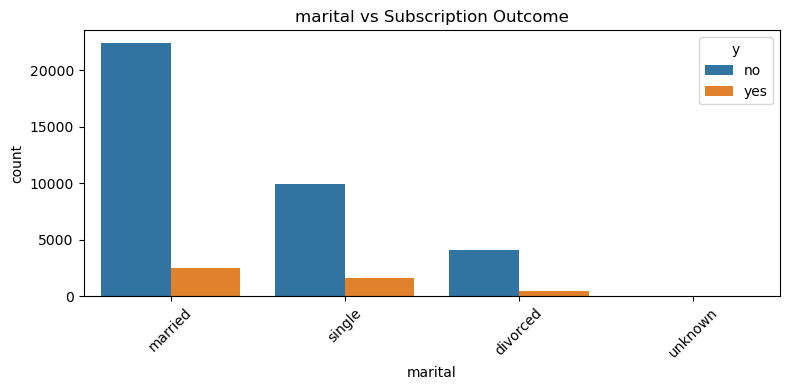

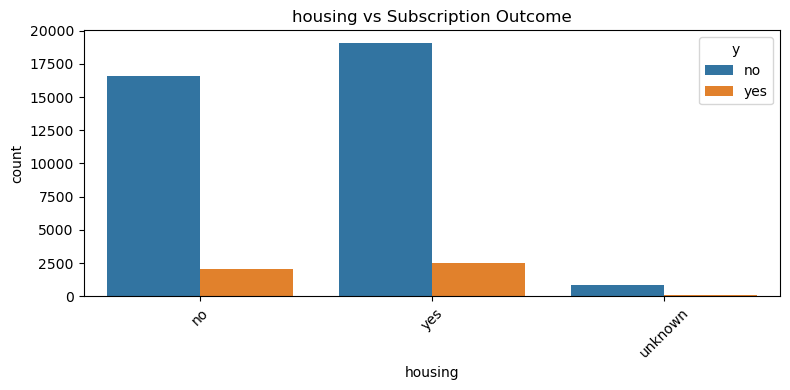

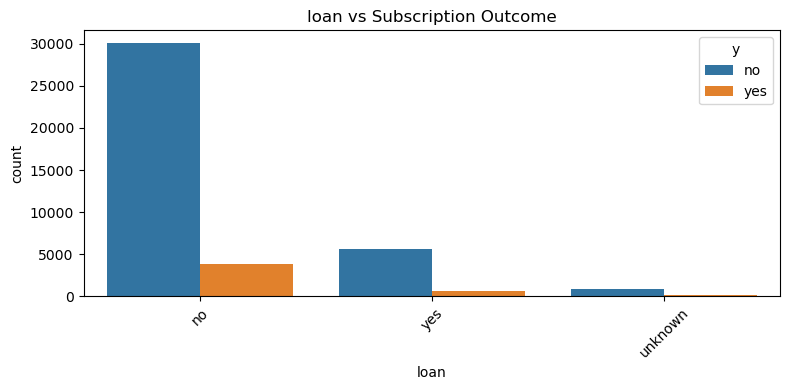

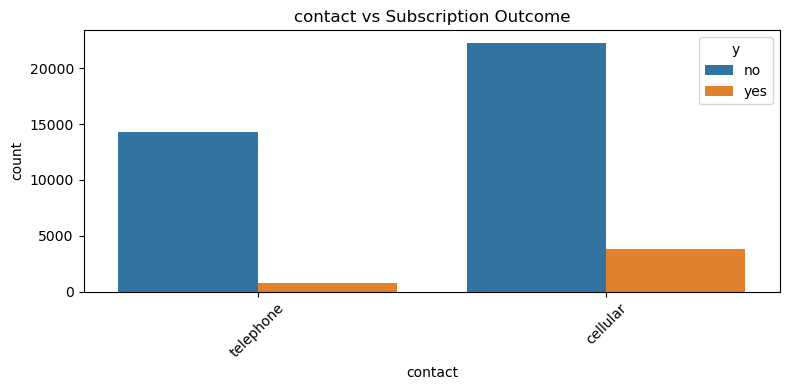

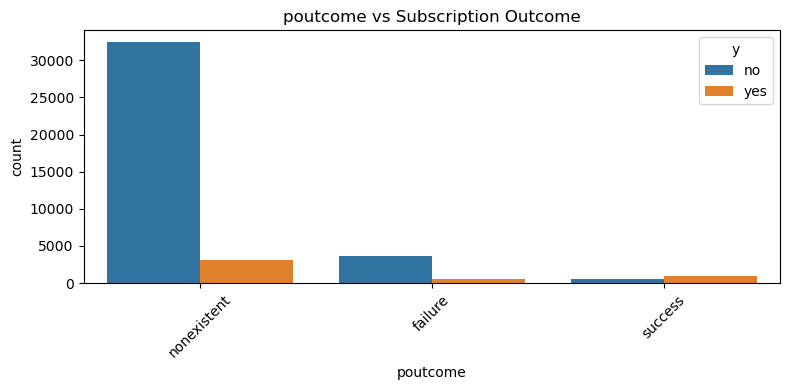

In [11]:
## selecting key categorical features for analysis
categorical_features = ['job', 'education', 'marital', 'housing', 'loan', 'contact', 'poutcome']

## count plots to show relationship between categorical features and target
for col in categorical_features:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue='y', data=df)
    plt.title(f'{col} vs Subscription Outcome')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

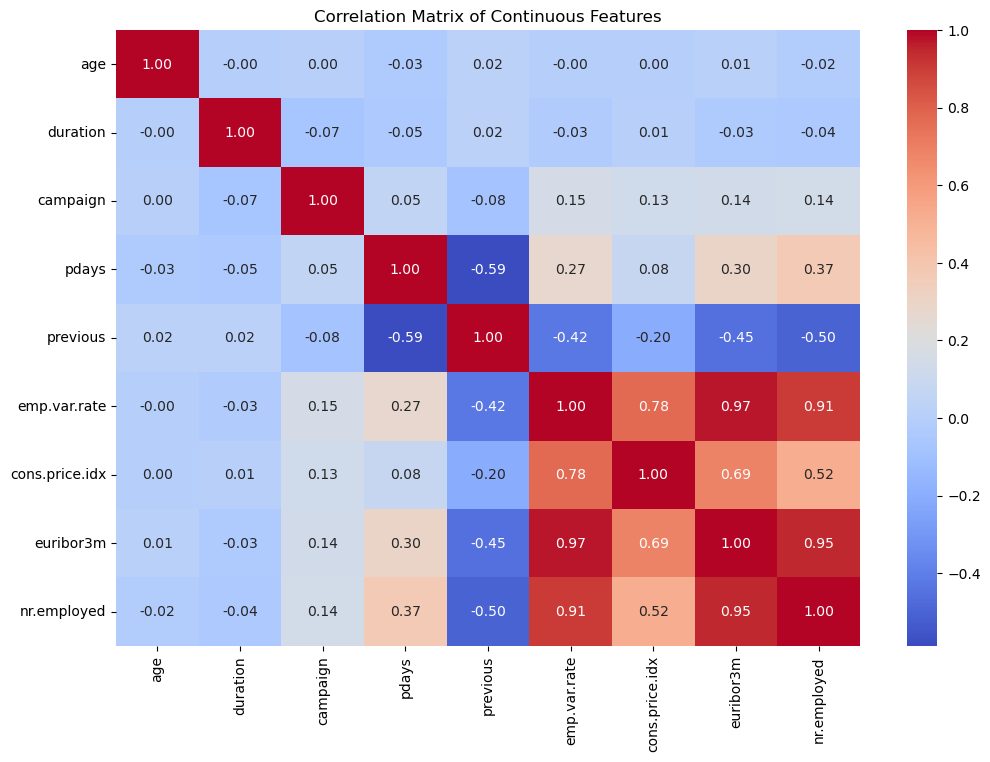

In [12]:
## Correlation matrix for continuous features
corr = df[continuous_features].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Continuous Features')
plt.show()

### Key Observations
- The target variable is highly imbalanced with fewer clients subscribing to a term deposit which may affect model performance and evaluation.
- The feature "duration" shows a strong seperation between subscribed and non-subscribed clients indicating high predictive power but also potential data leakage.
- "euribor3m" and "nr.employed" are strongly correlated which suggesting possible multicollinearity issues for linear models.

### Features likely to be useful:
- duration
- campaign
- pdays
- previous
- poutcome
- euribor3m
- nr.employed

### Features that may be problematic:
- duration due to the possible data leakage
- highly correlated variables
- class imbalance in target variable
- high-cardinality categorical features such as job

# 3. Data Preparation

The feature "duration" is excluded from modeling because its only known after a call has been completed which includes that it would cause data leakage and produce unrealistic performance.

## 3.1 Data Cleaning

In [13]:
## Check for missing values
df.isna().sum()

## Drop columns 
## Target 'y' is removed
df_features = df.drop(['duration', 'y'], axis=1)

print("Shape of dataset after dropping 'duration' and 'y':", df_features.shape)

# seperate target variable
y = df['y'].map({'yes': 1, 'no': 0})

Shape of dataset after dropping 'duration' and 'y': (41188, 19)


the target variable is encoded into binary values for model compatibility.

In [14]:
### Handling Categorical Data (One-Hot Encoding)
df_features = df.drop(['duration', 'y'], axis=1)

categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

## apply one hot encoding to categorical columns
df_encoded = pd.get_dummies(df_features, columns=categorical_cols, drop_first=True)

print("Shape after one-hot encoding:", df_encoded.shape)

Shape after one-hot encoding: (41188, 52)


One-Hot Endcoding is applied to categorical variables to allow the models to show non-numeric data without imposing ordinal relationships.

In [15]:
## scaling Continuous Features
## list of continuous numeric columns (excluding target and drop duration)
numeric_cols = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

## 3.2 Train-Test Split

In [16]:
## Split data into train set and test set
X_train, X_test, y_train, y_test = train_test_split(
   df_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape", X_train.shape)
print("Test set shape", X_test.shape)

Training set shape (32950, 52)
Test set shape (8238, 52)


The Train-Test Split ensures that class proportions remain consistent between training and testing datasets.

# 4. Modelling

In [17]:
X_train.dtypes.value_counts()

bool       43
float64     9
Name: count, dtype: int64

In [18]:
X_train.select_dtypes(include='object').columns

Index([], dtype='object')

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 4.2 Train Model

In [20]:
## Initialise and train model
# Logistic Regression, fast and interpretable
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train) # train model on training data

# Decision Tree, simple rule-based model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Random Forest for better performance and feature interactions
rforest = RandomForestClassifier(random_state=42)
rforest.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# 5. Model Evaluation

In [21]:
## Evaluate model
def evaluate_model(model, X, y, model_name):
    y_pred = model.predict(X)
    print(f"\n{model_name}")
    print("Accuracy:", accuracy_score(y, y_pred))
    print("Precision:", precision_score(y, y_pred))
    print("Recall:", recall_score(y, y_pred))
    print("F1 Score:", f1_score(y, y_pred))

In [22]:
evaluate_model(logreg, X_test_scaled, y_test, "Logistic Regression")
evaluate_model(dtree, X_test, y_test, "Decision Tree")
evaluate_model(rforest, X_test, y_test, "Random Forest")


Logistic Regression
Accuracy: 0.9011896091284293
Precision: 0.69
Recall: 0.22306034482758622
F1 Score: 0.33713355048859933

Decision Tree
Accuracy: 0.840009711094926
Precision: 0.30654761904761907
Recall: 0.3329741379310345
F1 Score: 0.31921487603305787

Random Forest
Accuracy: 0.8962126729788784
Precision: 0.5749486652977412
Recall: 0.3017241379310345
F1 Score: 0.3957597173144876


Recall is prioritised as a key metric because failing to identify potential subscribers represents a lost of business opportunity. 
Precision is also considered to avoid excessive marketing costs.

## Iterative model development


In [23]:
## Further feature engineering / feature selection
logreg_balanced = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg_balanced.fit(X_train_scaled, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### Iterative Model Development:
- the initial models were trained using Logistic Regression, Decision Tree and Random Forest Classifiers. While these models provide a reference point for performance comparison, a further refinement was required to better address the business problem and dataset characteristics.

### Addressing the Class Imbalance:
- the target variable is imbalanced with only about 11% to 12% of clients subscribing to a term deposit. The training models without accounting for the imbalance variable may be bias predictions towards the majority class.
- to modify this issue, the class weighting was applied to the selected models. By assigning a higher penalty to misclassified positive cases "subscribers", the models are encouraged to better identify potential customers.
- this adjustment was important for marketing use cases where failing to identify a likely subscriber represents a lost revenue opportunity.

### Feature Engineering and Selection:
- during the exploring of data analysis, the feature "duration" was found to have a strong influence on the target variable but the feature was excluded and remove from modeling because its only known after a marketing call has been completed. It will also introduce a data leakage and result in not realistic model performance.
- categorical variables were transformed using one-hot encoding to enable the algorithms to process non-numeric data without imposing ordinal relationships. Continuous variables were standardised for Logistic Regression to ensure that features with larger scales did not dominate the model.
- the feature engineering decisions were guided by both data driven insights from EDA and practical development considerations.

### Model Refinement and Performance Comparison:
- after applying the class weighting and feature preprocessing, the model performance was re-evaluated on the test set. Improvements were observed in recall and F1 Score which indicates a better identification of potential subscribers compared to the baseline models.
- using Random Forest shows the best balance between predictive performance and robustness which benefit from its ability to capture non-linear relationships and feature interactions.
- using Logistic Regression remained due to its interpretability which is important for explaining predictions in a business context.

### Hyperparameter Tuning:
- to further improve on my model performance, a hyperparameter tuning was used on the Random Forest Classifier using RandomizedSearchCV. Random Forest was chosen for tuning as it shows a strong baseline performance and robustness to feature interactions.
- a limited search space was used to balance computational efficiency with model performance and in line with project constraints. The model selection focuses more on improving recall and F1 Score to better identify potential subscribers in a marketing context.

### The Final Model Selection:
- the final model was chosen based on:
- quantitative performance metrics (Precision, Recall and F1 Score)
- the ability to handle class imbalance
- whether its suitable for deployment in a real world marketing application

- this approached is to ensure that the selected model not only performed well but also met the practical and business requirements of the problem.

In [24]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=100)

In [25]:
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2,4],
    'max_features': ['sqrt', 'log2', None]
}

In [26]:
from sklearn.metrics import make_scorer, f1_score
# Create F1 Scorer
f1_scorer = make_scorer(f1_score)

In [27]:
from sklearn.model_selection import RandomizedSearchCV

rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=param_dist,
                               n_iter=10, #number of random combinations
                               scoring='f1', # use string
                               cv=2, # 2-fold cross-validation
                               random_state=42,
                               n_jobs=1)

# Fit on training data
rf_random.fit(X_train, y_train)

# Best Parameters and Best Score
print("Best Parameters:", rf_random.best_params_)
print("Best F1 Score:", rf_random.best_score_)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}
Best F1 Score: 0.4928134008860099


In [28]:
# Get the best estimator
best_rf = rf_random.best_estimator_

# Predictions on test set
y_pred = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n:", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n:", confusion_matrix(y_test, y_pred))

Accuracy: 0.8764263170672494
F1 Score: 0.5273909006499535

Classification Report:
:               precision    recall  f1-score   support

           0       0.95      0.91      0.93      7310
           1       0.46      0.61      0.53       928

    accuracy                           0.88      8238
   macro avg       0.71      0.76      0.73      8238
weighted avg       0.89      0.88      0.88      8238


Confusion Matrix:
: [[6652  658]
 [ 360  568]]


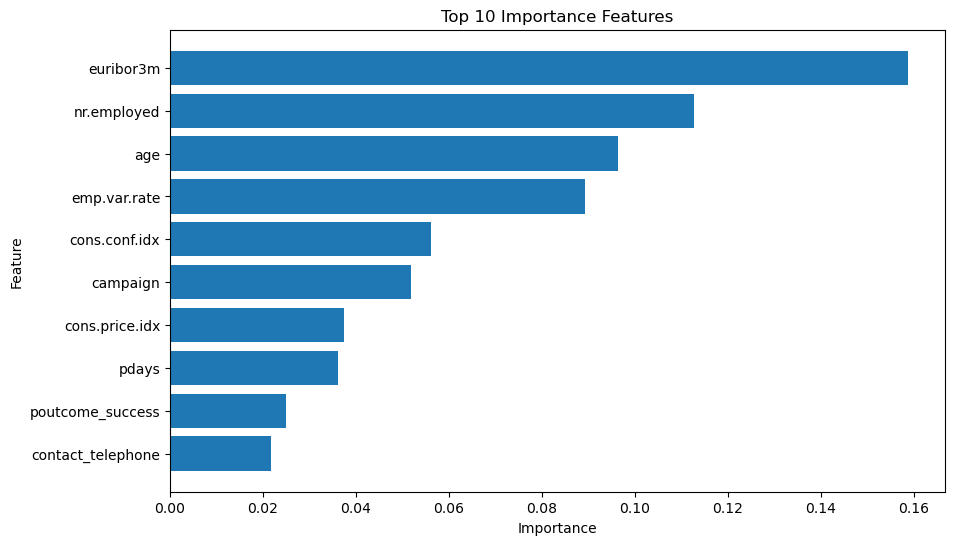

In [29]:
# Feature Importance
importances = best_rf.feature_importances_
features = X_train.columns

feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plotting the Top 10 Features
plt.figure(figsize=(10,6))
plt.barh(feat_df['Feature'][:10][::-1], feat_df['Importance'][:10][::-1])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Importance Features")
plt.show()

In [ ]:
## Save the model
import joblib

joblib.dump(best_rf, 'rf_model.pkl')
joblib.dump(df_encoded.columns.tolist(), 'model_columns.pkl')

['rf_model.pkl']